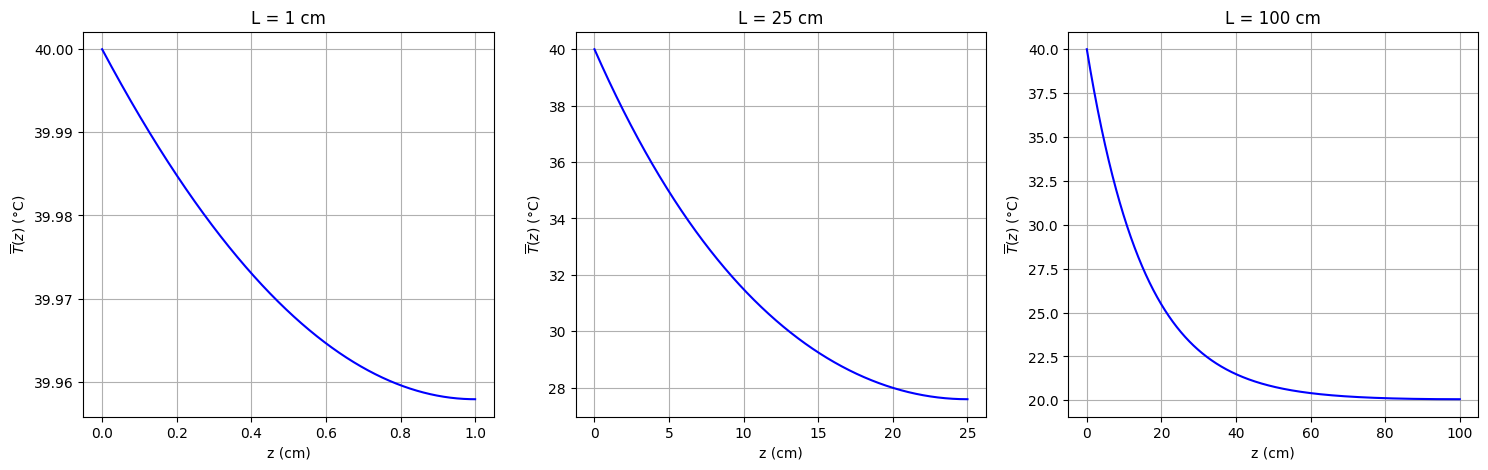

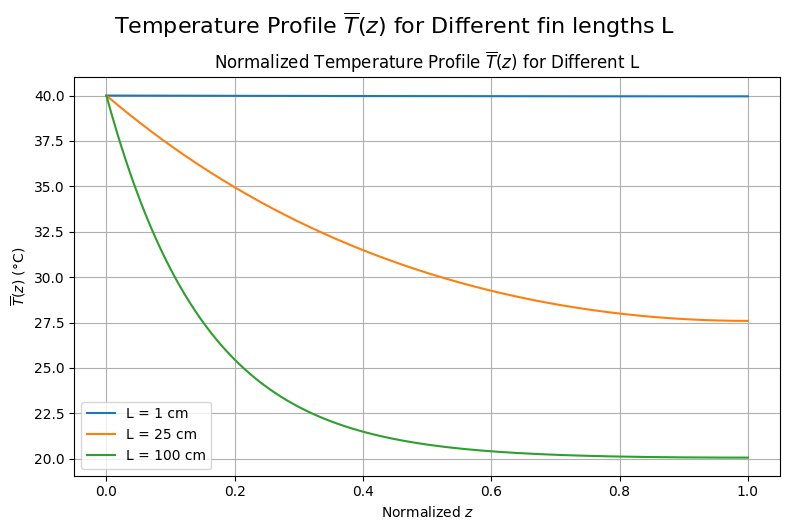

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def T_bar(z, T0, T_inf, h, k_material, W, L):
    # Convert W and L from cm to m for consistency in SI units
    W_m = W / 100
    L_m = L / 100
    z_m = z / 100
    
    k = np.sqrt(2 * h / (k_material * W_m))
    return T_inf + (T0 - T_inf) * (np.cosh(k * z_m) - np.tanh(k * L_m) * np.sinh(k * z_m))

# Parameters
T0 = 40
T_inf = 20
h = 50         # W/(m2.K)
k_material = 237  # W/(m.K)
W = 1          # cm
L_values = [1, 25, 100]  # cm
x_points = 5000

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, L in enumerate(L_values):
    z = np.linspace(0, L, x_points)  # in cm
    T_profile = T_bar(z, T0, T_inf, h, k_material, W, L)
    
    ax = axes[idx]
    ax.plot(z, T_profile, color='b')
    ax.set_title(f'L = {L} cm')
    ax.set_xlabel('z (cm)')
    ax.set_ylabel(r'$\overline{T}(z)$ (°C)')
    ax.grid(True)

# Normalized x-axis plot
fig2, ax2 = plt.subplots(figsize=(8, 5))
for L in L_values:
    z = np.linspace(0, L, x_points)
    T_profile = T_bar(z, T0, T_inf, h, k_material, W, L)
    z_norm = z / L
    ax2.plot(z_norm, T_profile, label=f'L = {L} cm')

ax2.set_title('Normalized Temperature Profile $\overline{T}(z)$ for Different L')
ax2.set_xlabel('Normalized $z$')
ax2.set_ylabel(r'$\overline{T}(z)$ (°C)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.suptitle(r'Temperature Profile $\overline{T}(z)$ for Different fin lengths L', fontsize=16, y=1.05)
plt.show()


39.996696071663386
38.839186544385825
35.4229079072436


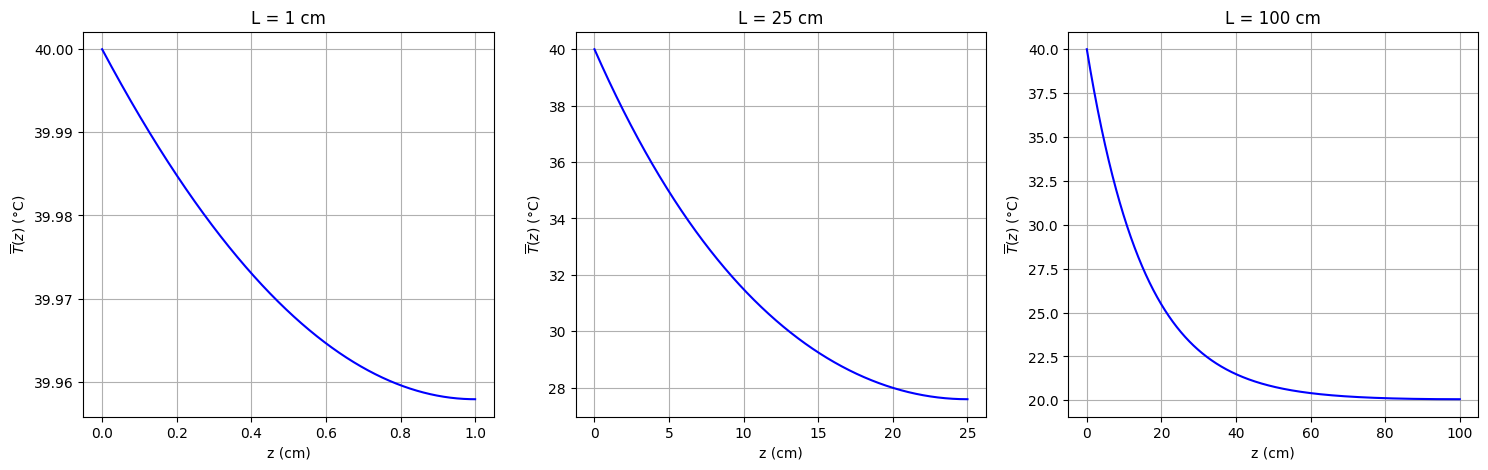

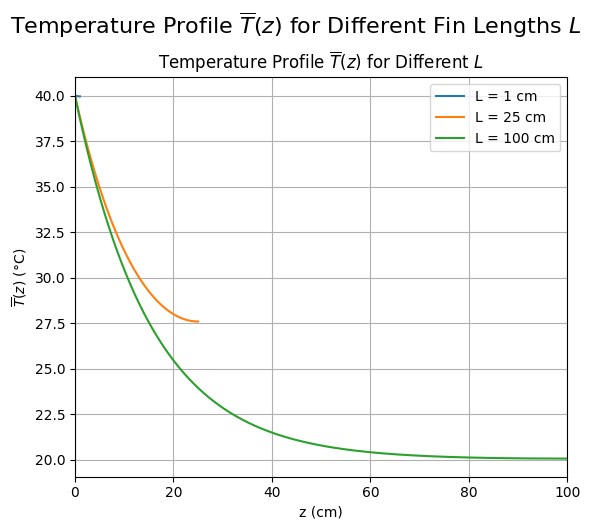

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def r(x, T0, T_inf, h, k, W_cm, L_cm):
    W = W_cm / 100  # Convert width to meters
    L = L_cm / 100  # Convert length to meters
    k_val = np.sqrt(2 * h / (k * W))  # Calculate k
    return T_inf + (T0 - T_inf) * (np.cosh(k_val * x / 100) - np.tanh(k_val * L) * np.sinh(k_val * x / 100))

# Parameters
T0 = 40
T_inf = 20
h = 50   # W/(m²·K)
k = 237  # W/(m·K)
W = 1    # cm
L_values = [1, 25, 100]  # in cm
x_points = 5000  # High resolution

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for idx, L in enumerate(L_values):
    x = np.linspace(0, L, x_points)
    y = r(x, T0, T_inf, h, k, W, L)
    print(y[200])
    
    ax = axes[idx]
    ax.plot(x, y, color='b')
    ax.set_title(f'L = {L} cm')
    ax.set_xlabel('z (cm)')
    ax.set_ylabel(r'$\overline{T}(z)$ (°C)')
    ax.grid(True)

# Create normalized plot (with same x units in cm for direct comparison)
fig2, ax2 = plt.subplots(figsize=(6, 5))
for L in L_values:
    x = np.linspace(0, L, x_points)
    y = r(x, T0, T_inf, h, k, W, L)
    ax2.plot(x, y, label=f'L = {L} cm')
    

ax2.set_title('Temperature Profile $\overline{T}(z)$ for Different $L$')
ax2.set_xlabel('z (cm)')
ax2.set_ylabel(r'$\overline{T}(z)$ (°C)')
ax2.set_xlim(0, max(L_values))
ax2.grid(True)
ax2.legend()

# Layout adjustments
plt.tight_layout()
plt.suptitle(r'Temperature Profile $\overline{T}(z)$ for Different Fin Lengths $L$', fontsize=16, y=1.05)

plt.show()


In [3]:
import numpy as np

result = np.sqrt((237 / 50) * 1e-2)
print(result)


0.21771541057077243


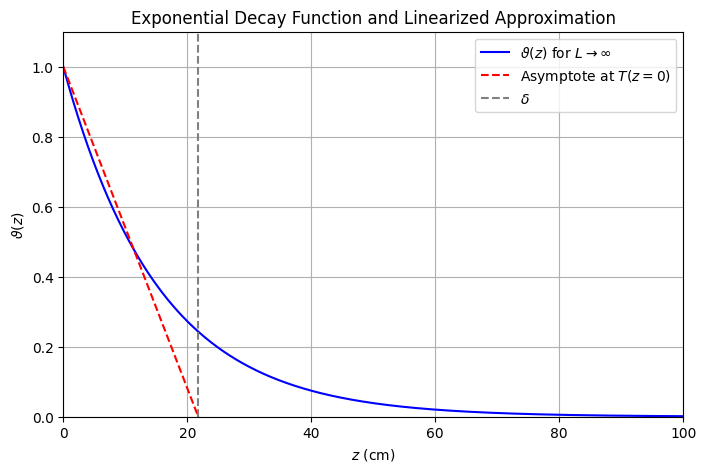

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Define delta as a function of the constants
def delta(k, W, h):
    return np.sqrt((k * W * 100) / h)

# Define the exponential decay function
def decay_function(x, delta_val):
    return np.exp(-np.sqrt(2) * x / delta_val)

# Compute the derivative of the decay function at x = 0
def decay_function_derivative(delta_val):
    return -1 / delta_val

# Parameters
k = 237  # W/(m·K)
W = 1    # cm
h = 50   # W/(m²·K)
T0 = 50
Tinf = 20

# Compute delta
delta_val = delta(k, W, h)

# Generate x-axis values
x_axis = np.linspace(0, 100, 500)  # in cm

# Compute decay function values
y_values = decay_function(x_axis, delta_val)

# Compute the derivative at x = 0
slope = decay_function_derivative(delta_val)

# Linearize the function at x = 0
linearized_y = 1 + slope * x_axis  # y = f(0) + f'(0) * x

# Plot the decay function and its linearized version
plt.figure(figsize=(8, 5))
plt.plot(x_axis, y_values, label=r'$\vartheta(z)$ for $L \rightarrow \infty$', color='b')
plt.plot(x_axis, linearized_y, label='Asymptote at $T(z=0)$', linestyle='--', color='r')
plt.title('Exponential Decay Function and Linearized Approximation')
plt.axvline(delta_val, color='grey', linestyle='--', label=r'$\delta$')
plt.xlabel(r'$z$ (cm)')
plt.ylabel(r'$\vartheta(z)$')
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 1.1)
plt.legend()    
plt.show()

delta_l = 21.771541057077243
z where tangent reaches T_inf: 15.39487451453091 cm


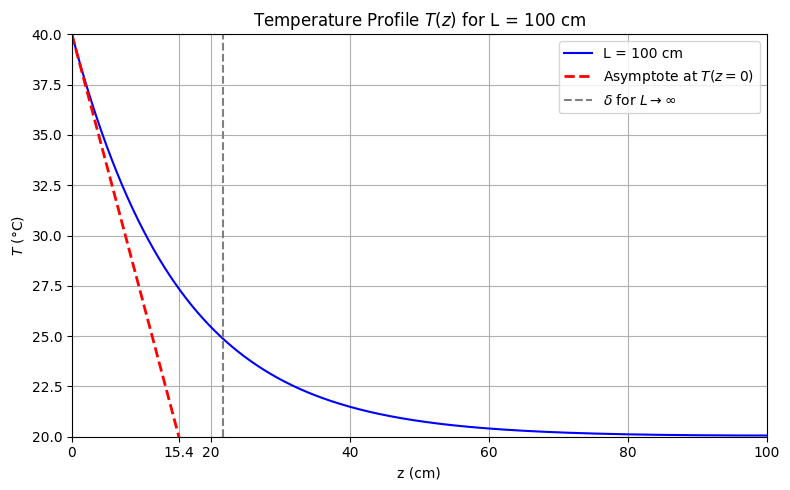

(np.float64(15.39487451453091), np.float64(21.771541057077243))

In [117]:
import numpy as np
import matplotlib.pyplot as plt

def T_bar(z, T0, T_inf, h, k_material, W, L):
    # Convert W and L from cm to m for consistency in SI units
    W_m = W / 100
    L_m = L / 100
    z_m = z / 100
    
    k = np.sqrt(2 * h / (k_material * W_m))
    return T_inf + (T0 - T_inf) * (np.cosh(k * z_m) - np.tanh(k * L_m) * np.sinh(k * z_m))

def dT_bar_dz_at_0(T0, T_inf, h, k_material, W, L):
    # Convert W and L from cm to m
    W_m = W / 100
    L_m = L / 100

    # Compute k
    k = np.sqrt(2 * h / (k_material * W_m))

    # Derivative at z = 0
    return -k * (T0 - T_inf) * np.tanh(k * L_m)

# Parameters
T0 = 40
T_inf = 20
h = 50         # W/(m2.K)
k_material = 237  # W/(m.K)
W = 1          # cm
L = 100        # cm
x_points = 5000

# Compute delta_l
k = np.sqrt(2 * h / (k_material * (W / 100)))
delta_l = np.sqrt(k_material * W / h) * 10
print("delta_l =", delta_l)

# Generate z values and compute the temperature profile
z = np.linspace(0, L, x_points)  # z in cm
T_profile = T_bar(z, T0, T_inf, h, k_material, W, L)

# Compute tangent line at z = 0
slope = dT_bar_dz_at_0(T0, T_inf, h, k_material, W, L)
z_tangent = np.linspace(0, 40, 300)  # cm
T0_at_z0 = T_bar(0, T0, T_inf, h, k_material, W, L)
T_tangent = T0_at_z0 + slope * (z_tangent / 100)  # convert cm to m for slope

# Find where tangent line reaches T_inf
z_at_Tinf_m = (T_inf - T0_at_z0) / slope  # in meters
z_at_Tinf_cm = z_at_Tinf_m * 100  # convert to cm
print("z where tangent reaches T_inf:", z_at_Tinf_cm, "cm")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z, T_profile, label=f'L = {L} cm', color='b')
plt.plot(z_tangent, T_tangent, 'r--', label=r'Asymptote at $T(z=0)$', linewidth=2)
plt.axvline(x=delta_l, color='grey', linestyle='--', label=r'$\delta$ for $L \rightarrow \infty$')

# Add tick at z_at_Tinf_cm
xticks = list(plt.xticks()[0])
xticks.append(z_at_Tinf_cm)
xticks = sorted(set(xticks))
plt.xticks(xticks)

# Update tick labels (formatting one specific value)
tick_labels = [f"{tick:.1f}" if abs(tick - z_at_Tinf_cm) < 0.1 else f"{tick:.0f}" for tick in xticks]
plt.gca().set_xticklabels(tick_labels)

plt.title('Temperature Profile $T(z)$ for L = 100 cm')
plt.xlabel('z (cm)')
plt.ylabel(r'$T$ (°C)')
plt.ylim(T_inf, T0)
plt.xlim(0, max(100, z_at_Tinf_cm + 10))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output the results
z_at_Tinf_cm, delta_l
